# generation of a document of plots
Tim Tyree<br>
9.4.2021

In [1]:
from lib.my_initialization import *
from lib import *
%load_ext autoreload
%autoreload 2

import random,scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib as mpl #for colorbar
from scipy import stats
#DONE: hook this routine up to dask
#DONT: hook this routine up to dask_cuda

In [2]:
# For darkmode plots
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
#TODO: update the title of q_versus_Delta_w to use the m,M best fit from the particle model

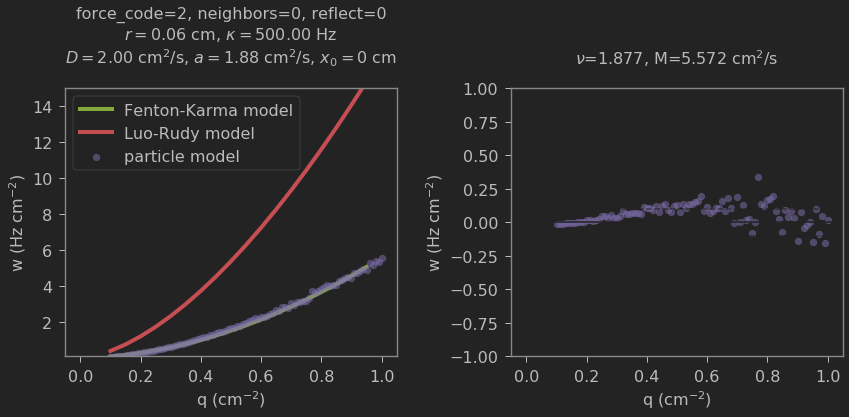

In [4]:
#test the plotters
# input_fn=search_for_file()
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all/job.out.14688026.0"
#plot figure-ready plots for one trial
fig,axs=plt.subplots(ncols=2,figsize=(12,6))
retval=q_vs_w_plotter_function(axs[0],data=input_fn)
assert(retval)
retval=q_vs_Delta_w_plotter_function(axs[1],data=input_fn)
assert(retval)
plt.tight_layout()
plt.show()

__Introductary Notes__
- here, the powerlaw fit is w=M*q**m, and Delta_X is the maximum disagreement one could expect to observe with 95% confidence.
- here, we observe Delta_X concerns disagreements between statistically independent measurements of X.
- ...

__Notes on nonsense local data__
- I still cannot explain/reproduce the anomalous drop in reaction rates
- This doesn't seem to be a problem with the remote data generation pipeline
- Quickest fix is to dev run 16 to run the ~55 jobs I have right now in run_15_all_ar_star.csv

__Notes on remote data__
- appears monotonic from a first glance at the raw numbers...

__A note on this data from the local pipeline__<br>
this data from the local pipeline is not making sense... there's a million moving parts, and i have recently used the remote pipeline... Maybe they cross talked because they print helper files to the same directories... Yep... I'd bet that's causing the wonky reads.  I have verified the problem does not exist in the funcitonal string formatting...  Therefore, we have the courage to say...

 __DONE:__ dev quick ar_star remote data run with 55 jobs gener_run_16.py and run it on the cloud!
 
 Now... Let's analyze ^these nifty repeatable results
 
 
- TODO(if results are spectacular): automate repeatable results to machine precision by making a copy of the main .submit file in c/attractive/ with every randomization seed set to 1234...

In [5]:
#we are not in the rounding phase...
#recall the results from the full models
wjr=recall_powerlaw_fits_to_full_models()
print_the_dict(wjr)
#TODO(later): plot the trials that were closest to ytrgt=m_FK
m_FK=wjr['fk_pbc']['m']

#
fk_pbc={'m': 1.8772341309722325, 'Delta_m': 0.02498750277237229, 'M': 5.572315674840435, 'Delta_M': 0.3053120355191732}
lr_pbc={'m': 1.6375562704001745, 'Delta_m': 0.017190912126700632, 'M': 16.73559858353835, 'Delta_M': 0.8465090320196467}
fk_ncbc={'m': 1.854156794480594, 'Delta_m': 0.02503190538288011, 'M': 7.135532649256895, 'Delta_M': 0.4548432215549294}
lr_ncbc={'m': 1.6611400039209043, 'Delta_m': 0.02740424198712116, 'M': 16.75061667963681, 'Delta_M': 1.3110747548319708}

#fk_ncbc
m=1.854156794480594
Delta_m=0.02503190538288011
M=7.135532649256895
Delta_M=0.4548432215549294

#fk_pbc
m=1.8772341309722325
Delta_m=0.02498750277237229
M=5.572315674840435
Delta_M=0.3053120355191732

#lr_ncbc
m=1.6611400039209043
Delta_m=0.02740424198712116
M=16.75061667963681
Delta_M=1.3110747548319708

#lr_pbc
m=1.6375562704001745
Delta_m=0.017190912126700632
M=16.73559858353835
Delta_M=0.8465090320196467


saving .pdf to
/home/timothytyree/Documents/GitHub/bgmc/python/../fig/run_16_all_plotted.pdf...


FileNotFoundError: [Errno 2] File /home/timothytyree/Documents/GitHub/bgmc/python/job.out.14688026.23 does not exist: '/home/timothytyree/Documents/GitHub/bgmc/python/job.out.14688026.23'

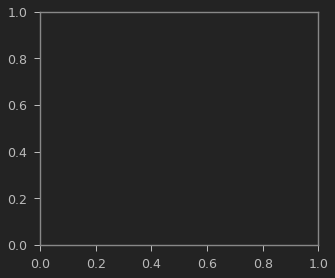

In [6]:
#copy/paste of Example Usage in bluf.py
modname=os.path.basename(os.path.dirname(input_fn))
save_folder=os.path.dirname(os.path.dirname(input_fn))
save_folder=f"{nb_dir}/../fig"
bluf_dir = save_folder+f"/{modname}_plotted.pdf"
# bluf_dir = f"{nb_dir}/Figures/{modname}_plotted.pdf"

# settings from lib
# nb_dir=os.path.dirname(os.path.dirname(os.getcwd()))
#find all files matching pattern
# input_fn_lst=get_all_files_matching_pattern(file=input_fn,trgt='')
input_fn_lst=os.listdir(os.path.dirname(input_fn))
#define the lists of plotter tasks
task_lst = []
for fn in input_fn_lst:
    task_lst.append((q_vs_w_plotter_function, os.path.abspath(fn)))
    task_lst.append((q_vs_Delta_w_plotter_function, os.path.abspath(fn)))

print(f'saving .pdf to\n{bluf_dir}...')
gener_bluf(task_lst, bluf_dir, save_tight=False)
# gener_bluf(task_lst, bluf_dir, bbox_inches='tight', save_tight=True)

#open the outputed .pdf automatically
import webbrowser
webbrowser.open_new(r'file://' + bluf_dir);